In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('float_format', '{:.2f}'.format)         #Display comma separator for thousands and 2 decimals
file_name = '2900_per_day'
file_extension = 'csv'
#Create DataFrame with tweets and Sentiment Scores from TextBlob
df = pd.read_csv(r'C:\\Users\\Yairb\\Desktop\\PythonPP\\Datasets\\' + file_name + '.csv')
df['user_created_at'] = pd.to_datetime(df['user_created_at'])               #Change datatype to datetime
df['date'] = pd.to_datetime(df['date'])               #Change datatype to datetime
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df = df.drop(columns=['index'])

In [6]:
print(df.head())

                    id                date  \
0  1312158696990883840 2020-10-02 22:33:06   
1  1312173490674438144 2020-10-02 23:31:53   
2  1312156472583680000 2020-10-02 22:24:16   
3  1312156337069989891 2020-10-02 22:23:44   
4  1312179509269917697 2020-10-02 23:55:48   

                                                                                                                                                                                                                                                                                                                                text  \
0                                                                                       Nearly one month before the US election president Trump is transferred by helicopter to hospital where he is expected to work for the “next few days” after contracting #COVID19 and developing a fever. #potuscovid https://t.co/bpGmPSsKYq   
1                       @notthebeendall @notthebeendall  This fundr

In [3]:
print(df.shape)

(52200, 12)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52200 entries, 0 to 52199
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     52200 non-null  int64         
 1   date                   52200 non-null  datetime64[ns]
 2   text                   52200 non-null  object        
 3   user                   52200 non-null  object        
 4   location               36617 non-null  object        
 5   retweet_count          52200 non-null  int64         
 6   source                 52184 non-null  object        
 7   user_friends_count     52200 non-null  int64         
 8   user_followers_count   52200 non-null  int64         
 9   user_created_at        52200 non-null  datetime64[ns]
 10  user_listed_count      52200 non-null  int64         
 11  user_favourites_count  52200 non-null  int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory usage: 4.8+

In [5]:
#Get Time Frame of Data Set
print("Date Column Description")
print(df['date'].describe(datetime_is_numeric=True))
print("\n")

print("Time Frame of Data Set")
print("First Tweet posted on:" + str(df['date'].min()))
print("Last Tweet poster on: " + str(df['date'].max()))
print("Total Days:           " + str(df['date'].max() - df['date'].min()))


Date Column Description
count                            52200
mean     2020-10-11 06:47:09.906034432
min                2020-10-02 22:08:31
25%                2020-10-06 21:30:06
50%         2020-10-11 05:29:00.500000
75%      2020-10-15 13:50:08.499999744
max                2020-10-19 23:59:48
Name: date, dtype: object


Time Frame of Data Set
First Tweet posted on: 2020-10-02 22:08:31
Last Tweet poster on:  2020-10-19 23:59:48
Total Days:            17 days 01:51:17


In [6]:
#Get Description and Unique Values from User Column
print(df['user'].describe(), "\n")
print("User Value Counts Top 10")
print(df['user'].value_counts().head(10))

count               52200
unique              23961
top       CupofJoeintheD2
freq                  900
Name: user, dtype: object 

User Value Counts Top 10
CupofJoeintheD2    900
DuRoRoDu           542
HenryAl07332400    428
ppl4justice        422
Hotpage_News       368
GlobalPandemics    325
alfysantillana     322
BigdogFnh          322
palazzo214         313
DenmarkRepent      190
Name: user, dtype: int64


In [20]:
print("Cu***********D2")
print("Du****Du")
print("He***********00")
print("pp*******ce")
print("Ho********ws")
print("Gl***********cs")
print("Bi*****nh")
print("al**********na")
print("pa******14")
print("De*********nt")

Cu***********D2
Du****Du
He***********00
pp*******ce
Ho********ws
Gl***********cs
Bi*****nh
al**********na
pa******14
De*********nt


In [2]:
#Location Description
print(df['location'].describe(), "\n")
print(df['location'].value_counts().head(10))


count             36617
unique             7979
top       United States
freq               2101
Name: location, dtype: object 

United States              2101
In the "D"                  900
USA                         745
United States of Corona     542
Florida, USA                541
Washington, DC              509
New York, NY                502
California, USA             474
WORLDWIDE                   406
Miami, FL                   382
Name: location, dtype: int64


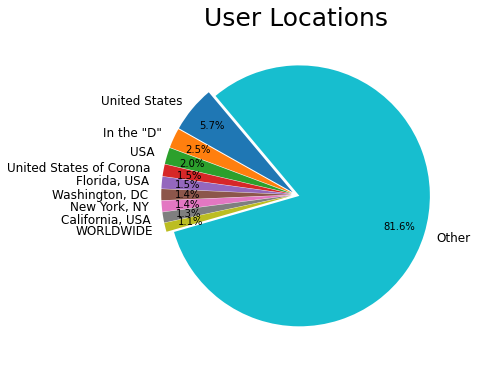

In [14]:
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=15
locations = df['location'].value_counts()
locations2 = locations.iloc[:9]
locations2.loc['Other'] = locations.iloc[9:].sum()

pie, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))
plt.pie(locations2.values, labels=locations2.index, autopct="%1.1f%%", 
        explode=[0.03]*10, pctdistance=0.8, startangle=130)
plt.title("User Locations", fontsize=25)

plt.show()

In [15]:
#Retweet Count Column Description
print("Retweet Count Descriptive Statistics")
print(df['retweet_count'].describe())

Retweet Count Descriptive Statistics
count   52200.00
mean        5.66
std       129.55
min         0.00
25%         0.00
50%         0.00
75%         0.00
max     15024.00
Name: retweet_count, dtype: float64


In [16]:
#Source column Description
print("Source Column Information")
print("Diferent Values")
print(df['source'].describe())

Source Column Information
Diferent Values
count               52184
unique                183
top       Twitter Web App
freq                20250
Name: source, dtype: object


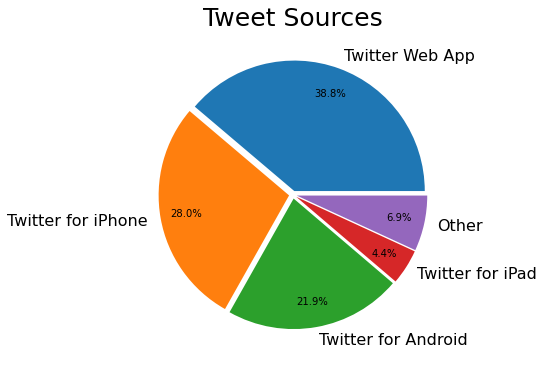

In [22]:
sources = df['source'].value_counts()
sources2 = sources.iloc[:4]
sources2.loc['Other'] = sources.iloc[4:].sum()

plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=15

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(sources2.values, labels=sources2.index, autopct="%.1f%%", 
        explode=[0.03]*5, pctdistance=0.8)
plt.title("Tweet Sources", fontsize=25)
plt.show()

In [23]:
#User Friends Count Description
print("User Friends Count Descriptive Statistics")
print(df['user_friends_count'].describe())

User Friends Count Descriptive Statistics
count    52200.00
mean      3258.43
std      12303.00
min          0.00
25%        204.00
50%        878.00
75%       3065.25
max     621414.00
Name: user_friends_count, dtype: float64


In [24]:
#User Followers Count
print("User Followers Count Descriptive Statistics")
print(df['user_followers_count'].describe())


User Followers Count Descriptive Statistics
count      52200.00
mean       27322.56
std       380713.87
min            0.00
25%          111.00
50%          706.00
75%         3300.00
max     22480462.00
Name: user_followers_count, dtype: float64


In [26]:
#User Created At Description
print("User Created At Column Description")
print(df['user_created_at'].describe(datetime_is_numeric=True), "\n")

print("User Created at Descriptive Statistics")
print("Oldest User on Data Set: " + str(df['user_created_at'].min()))
print("Newest User on Data Set: " + str(df['user_created_at'].max()))
print("Mean:                    " + str(df['user_created_at'].mean()))

User Created At Column Description
count                            52200
mean     2014-05-22 15:46:55.930740992
min                2006-07-17 01:21:51
25%                2010-07-10 14:26:17
50%                2013-10-13 18:24:56
75%                2018-06-27 12:42:50
max                2020-10-19 17:23:05
Name: user_created_at, dtype: object 

User Created at Descriptive Statistics
Oldest User on Data Set: 2006-07-17 01:21:51
Newest User on Data Set: 2020-10-19 17:23:05
Mean:                    2014-05-22 15:46:55.930740992


In [27]:
#User Listed Count Column Description
print("User Listed Count Descriptive Statistics")
print(df['user_listed_count'].describe())

User Listed Count Descriptive Statistics
count    52200.00
mean       174.65
std       1360.74
min          0.00
25%          0.00
50%          5.00
75%         43.00
max     122235.00
Name: user_listed_count, dtype: float64


In [28]:
#User Favourites Count
print("User Favourites Count Descriptive Statistics")
print(df['user_favourites_count'].describe())

User Favourites Count Descriptive Statistics
count     52200.00
mean      30567.92
std       66469.42
min           0.00
25%        1163.00
50%        7497.50
75%       28770.00
max     1400095.00
Name: user_favourites_count, dtype: float64
